# Trực quan hóa dữ liệu điểm du lịch Hà Nội

Notebook này trình bày các loại biểu đồ phổ biến để trực quan hóa dữ liệu từ file `hanoi_attractions.json`.

- Biểu đồ cột (Bar Chart)
- Biểu đồ đường (Line Chart)
- Biểu đồ tròn (Pie Chart)
- Biểu đồ phân tán (Scatter Plot)
- Biểu đồ histogram
- Biểu đồ hộp (Box Plot)
- Biểu đồ diện tích (Area Chart)
- Biểu đồ heatmap
- Bản đồ vị trí (Map)

Các biểu đồ sử dụng thư viện pandas, matplotlib, seaborn, plotly, folium.

In [1]:
# Nhập các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import json
from folium.plugins import HeatMap

# Hiển thị biểu đồ trực tiếp trong notebook
%matplotlib inline

In [2]:
# Đọc dữ liệu từ file hanoi_attractions.json
with open('data/hanoi_attractions.json', encoding='utf-8') as f:
    data = json.load(f)

# Chuyển dữ liệu thành DataFrame
# Giả sử mỗi phần tử là 1 điểm du lịch, có các trường: name, type, lat, lng, rating, user_ratings_total, ...
df = pd.DataFrame(data)
df.head()

,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,rating,reference,types,user_ratings_total,plus_code
0,OPERATIONAL,"2RJV+2J, Hàng Bông, Hoàn Kiếm, Hà Nội 100000","{'location': {'lat': 21.0300625, 'lng': 105.84...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Hanoi Train Street,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJhdgfXrirNTER-EREhqaQx28,4.4,ChIJhdgfXrirNTER-EREhqaQx28,"[tourist_attraction, point_of_interest, establ...",15023,NaN
1,OPERATIONAL,"3CV2+VV8 Xoan Road, Vân Hoà, Ba Vì, Hà Nội","{'location': {'lat': 21.0946745, 'lng': 105.40...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Điểm tham quan hoa dã quỳ Ba Vì,{'open_now': True},"[{'height': 400, 'html_attributions': ['<a hre...",ChIJk3Ru5H5hNDER5CGJIogumWY,4.6,ChIJk3Ru5H5hNDER5CGJIogumWY,"[tourist_attraction, point_of_interest, establ...",65,NaN
2,OPERATIONAL,"P. Lê Thạch, Tràng Tiền, Hoàn Kiếm, Hà Nội","{'location': {'lat': 21.0274259, 'lng': 105.85...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Sword Lake Octagon House,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJm3YS_eqrNTERUWy7787s8sc,4.6,ChIJm3YS_eqrNTERUWy7787s8sc,"[tourist_attraction, point_of_interest, establ...",193,"{'compound_code': '2VG3+XW Hoàn Kiếm, Hanoi', ..."
3,OPERATIONAL,"Nhà hàng tam gà lẩu nướng PT01.TV, 32 PT01.TV-...","{'location': {'lat': 20.9570904, 'lng': 105.98...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Clock Tower Grand World - Venice,NaN,"[{'height': 3847, 'html_attributions': ['<a hr...",ChIJBRv6QAClNTERaMDrYuWpv8E,4.8,ChIJBRv6QAClNTERaMDrYuWpv8E,"[tourist_attraction, point_of_interest, establ...",13,"{'compound_code': 'XX4M+R5 Văn Giang, Hung Yen..."
4,OPERATIONAL,"26 Ng. 224 Lê Duẩn, Khâm Thiên, Đống Đa, Hà Nội","{'location': {'lat': 21.0179782, 'lng': 105.84...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Train Street Hanoi,NaN,"[{'height': 3000, 'html_attributions': ['<a hr...",ChIJC-8ycwCrNTERwiOOrRsnxCs,4.7,ChIJC-8ycwCrNTERwiOOrRsnxCs,"[tourist_attraction, point_of_interest, establ...",375,"{'compound_code': '2R9R+58 Đống Đa, Hanoi', 'g..."


In [3]:
# Chuẩn hóa cột lat/lng cho các biểu đồ bản đồ
# Nếu có geometry/location, lấy lat/lng từ đó
if 'lat' not in df.columns or 'lng' not in df.columns:
    if 'geometry' in df.columns:
        df['lat'] = df['geometry'].apply(lambda g: g.get('location', {}).get('lat') if isinstance(g, dict) else None)
        df['lng'] = df['geometry'].apply(lambda g: g.get('location', {}).get('lng') if isinstance(g, dict) else None)
    elif 'location' in df.columns:
        df['lat'] = df['location'].apply(lambda l: l.get('lat') if isinstance(l, dict) else None)
        df['lng'] = df['location'].apply(lambda l: l.get('lng') if isinstance(l, dict) else None)

print('Kiểm tra cột lat/lng:', df[['lat','lng']].head())

Kiểm tra cột lat/lng:          lat         lng
0  21.030062  105.844063
1  21.094674  105.402217
2  21.027426  105.854870
3  20.957090  105.982999
4  21.017978  105.840824


In [4]:
# Kiểm tra các cột thực tế và chuẩn hóa cột 'type' cho các biểu đồ
print('Các cột trong DataFrame:', df.columns.tolist())

# Nếu có cột 'types' là list, chuyển thành cột 'type' lấy giá trị đầu tiên
if 'type' not in df.columns:
    if 'types' in df.columns:
        df['type'] = df['types'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Khác')
    elif 'category' in df.columns:
        df['type'] = df['category']
    else:
        df['type'] = 'Khác'

# Xem lại 5 dòng đầu
df.head()

Các cột trong DataFrame: ['business_status', 'formatted_address', 'geometry', 'icon', 'icon_background_color', 'icon_mask_base_uri', 'name', 'opening_hours', 'photos', 'place_id', 'rating', 'reference', 'types', 'user_ratings_total', 'plus_code', 'lat', 'lng']


,business_status,formatted_address,geometry,icon,icon_background_color,icon_mask_base_uri,name,opening_hours,photos,place_id,rating,reference,types,user_ratings_total,plus_code,lat,lng,type
0,OPERATIONAL,"2RJV+2J, Hàng Bông, Hoàn Kiếm, Hà Nội 100000","{'location': {'lat': 21.0300625, 'lng': 105.84...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Hanoi Train Street,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJhdgfXrirNTER-EREhqaQx28,4.4,ChIJhdgfXrirNTER-EREhqaQx28,"[tourist_attraction, point_of_interest, establ...",15023,NaN,21.030062,105.844063,tourist_attraction
1,OPERATIONAL,"3CV2+VV8 Xoan Road, Vân Hoà, Ba Vì, Hà Nội","{'location': {'lat': 21.0946745, 'lng': 105.40...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Điểm tham quan hoa dã quỳ Ba Vì,{'open_now': True},"[{'height': 400, 'html_attributions': ['<a hre...",ChIJk3Ru5H5hNDER5CGJIogumWY,4.6,ChIJk3Ru5H5hNDER5CGJIogumWY,"[tourist_attraction, point_of_interest, establ...",65,NaN,21.094674,105.402217,tourist_attraction
2,OPERATIONAL,"P. Lê Thạch, Tràng Tiền, Hoàn Kiếm, Hà Nội","{'location': {'lat': 21.0274259, 'lng': 105.85...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Sword Lake Octagon House,{'open_now': True},"[{'height': 3024, 'html_attributions': ['<a hr...",ChIJm3YS_eqrNTERUWy7787s8sc,4.6,ChIJm3YS_eqrNTERUWy7787s8sc,"[tourist_attraction, point_of_interest, establ...",193,"{'compound_code': '2VG3+XW Hoàn Kiếm, Hanoi', ...",21.027426,105.854870,tourist_attraction
3,OPERATIONAL,"Nhà hàng tam gà lẩu nướng PT01.TV, 32 PT01.TV-...","{'location': {'lat': 20.9570904, 'lng': 105.98...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Clock Tower Grand World - Venice,NaN,"[{'height': 3847, 'html_attributions': ['<a hr...",ChIJBRv6QAClNTERaMDrYuWpv8E,4.8,ChIJBRv6QAClNTERaMDrYuWpv8E,"[tourist_attraction, point_of_interest, establ...",13,"{'compound_code': 'XX4M+R5 Văn Giang, Hung Yen...",20.957090,105.982999,tourist_attraction
4,OPERATIONAL,"26 Ng. 224 Lê Duẩn, Khâm Thiên, Đống Đa, Hà Nội","{'location': {'lat': 21.0179782, 'lng': 105.84...",https://maps.gstatic.com/mapfiles/place_api/ic...,#13B5C7,https://maps.gstatic.com/mapfiles/place_api/ic...,Train Street Hanoi,NaN,"[{'height': 3000, 'html_attributions': ['<a hr...",ChIJC-8ycwCrNTERwiOOrRsnxCs,4.7,ChIJC-8ycwCrNTERwiOOrRsnxCs,"[tourist_attraction, point_of_interest, establ...",375,"{'compound_code': '2R9R+58 Đống Đa, Hanoi', 'g...",21.017978,105.840824,tourist_attraction


## 1. Biểu đồ cột: Số lượng điểm du lịch theo loại
Hiển thị số lượng điểm du lịch của từng loại (type) bằng biểu đồ cột.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\2037121614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


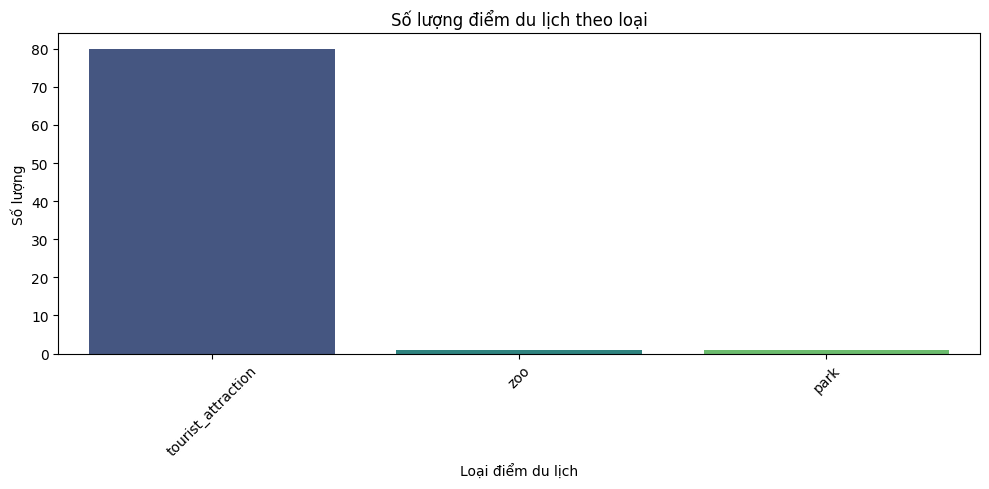

In [5]:
# Đếm số lượng điểm theo loại (type)
type_counts = df['type'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Số lượng điểm du lịch theo loại')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Biểu đồ tròn: Tỷ lệ các loại điểm du lịch
Hiển thị tỷ lệ phần trăm các loại điểm du lịch bằng biểu đồ tròn.

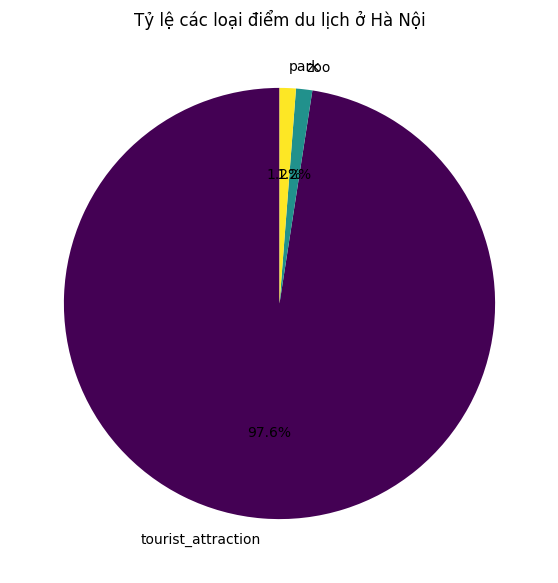

In [6]:
# Biểu đồ tròn tỷ lệ các loại điểm du lịch
plt.figure(figsize=(7,7))
type_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Tỷ lệ các loại điểm du lịch ở Hà Nội')
plt.ylabel('')
plt.show()

## 3. Biểu đồ phân tán: Vị trí các điểm du lịch trên bản đồ
Hiển thị vị trí các điểm du lịch trên bản đồ Hà Nội bằng Folium.

In [7]:
# Tạo bản đồ Folium với các điểm du lịch
center_lat, center_lng = 21.0285, 105.8542  # Trung tâm Hà Nội
m = folium.Map(location=[center_lat, center_lng], zoom_start=12)

for _, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name'],
        tooltip=row['type']
    ).add_to(m)

m.save('data/hanoi_attractions_map.html')
# Hiển thị bản đồ trong notebook (nếu dùng JupyterLab, dùng folium_static nếu có streamlit)
m

## 4. Biểu đồ phân tán (Scatter Plot): Rating theo số lượng đánh giá
Thể hiện mối quan hệ giữa rating và số lượng đánh giá của các điểm du lịch.

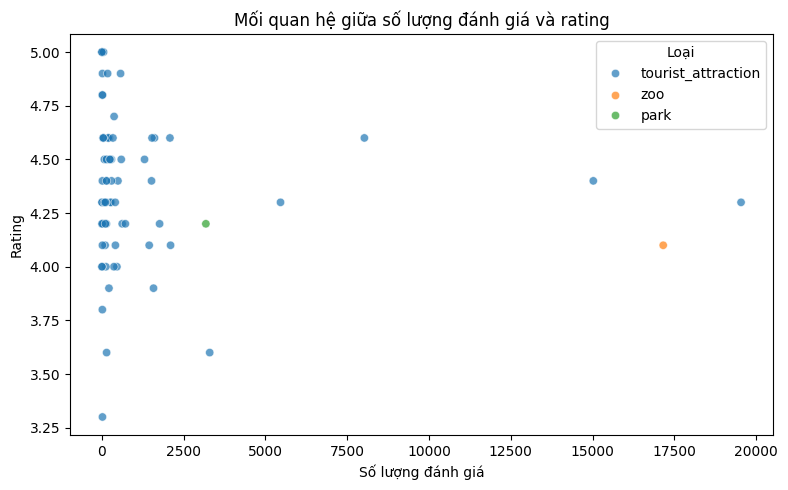

In [8]:
# Biểu đồ phân tán rating vs số lượng đánh giá
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='user_ratings_total', y='rating', hue='type', palette='tab10', alpha=0.7)
plt.title('Mối quan hệ giữa số lượng đánh giá và rating')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Rating')
plt.legend(title='Loại')
plt.tight_layout()
plt.show()

## 5. Biểu đồ histogram: Phân phối rating các điểm du lịch
Hiển thị phân phối tần suất của rating các điểm du lịch bằng histogram.

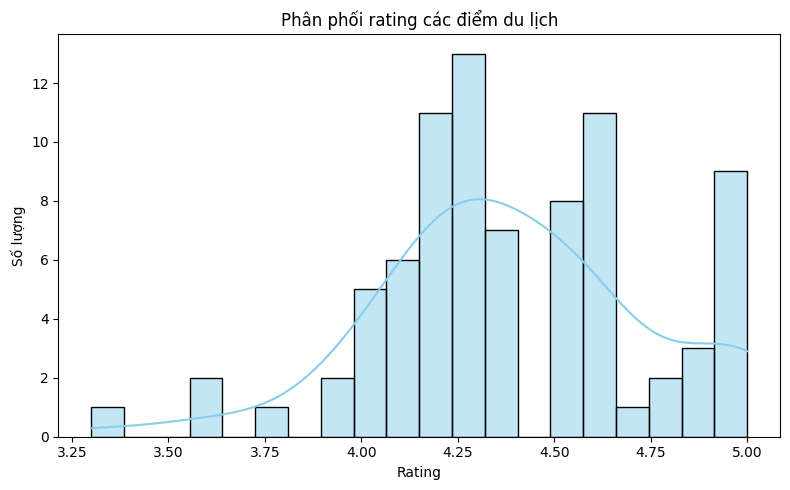

In [9]:
# Histogram phân phối rating
plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Phân phối rating các điểm du lịch')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

## 6. Biểu đồ hộp (Box Plot): Phân bố rating theo loại điểm du lịch
So sánh phân bố rating giữa các loại điểm du lịch bằng boxplot.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\3402595415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='rating', palette='Set2')


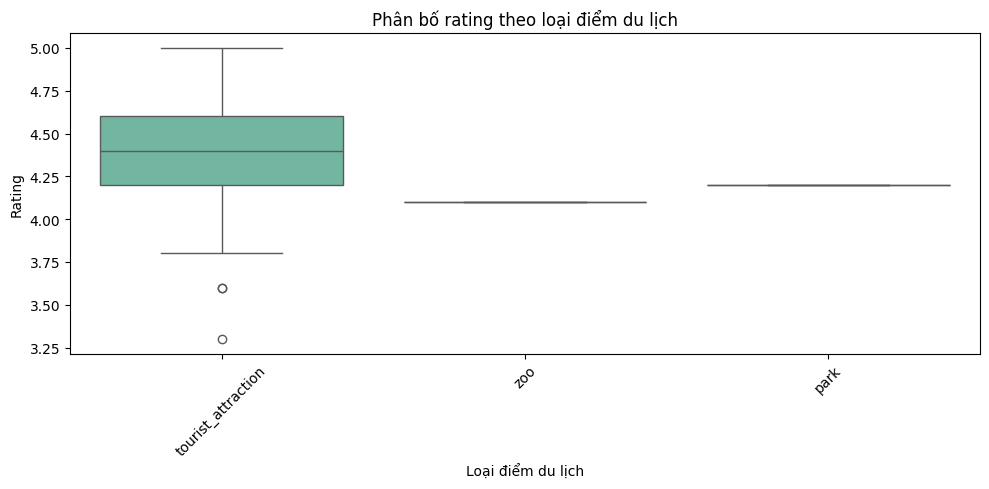

In [10]:
# Boxplot rating theo loại điểm du lịch
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='type', y='rating', palette='Set2')
plt.title('Phân bố rating theo loại điểm du lịch')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Biểu đồ diện tích (Area Chart): Số lượng điểm du lịch theo năm thành lập (nếu có)
Nếu dữ liệu có trường 'year_established', vẽ biểu đồ diện tích số lượng điểm theo năm.

In [11]:
# Nếu có trường 'year_established', vẽ area chart
if 'year_established' in df.columns:
    year_counts = df['year_established'].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    plt.fill_between(year_counts.index, year_counts.values, color='lightcoral', alpha=0.7)
    plt.title('Số lượng điểm du lịch theo năm thành lập')
    plt.xlabel('Năm thành lập')
    plt.ylabel('Số lượng')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường year_established trong dữ liệu.')

Không có trường year_established trong dữ liệu.


## 8. Biểu đồ heatmap: Mật độ điểm du lịch trên bản đồ Hà Nội
Hiển thị heatmap mật độ các điểm du lịch bằng Folium.

In [12]:
# Heatmap mật độ điểm du lịch
heat_data = df[['lat', 'lng']].dropna().values.tolist()
m_heat = folium.Map(location=[center_lat, center_lng], zoom_start=12)
HeatMap(heat_data, radius=15).add_to(m_heat)
m_heat.save('data/hanoi_attractions_heatmap.html')
m_heat

## 9. Bảng dữ liệu tổng hợp
Hiển thị bảng dữ liệu tổng hợp các điểm du lịch nổi bật nhất theo rating và số lượng đánh giá.

In [13]:
# Hiển thị top 10 điểm du lịch nổi bật nhất
top_attractions = df.sort_values(['rating', 'user_ratings_total'], ascending=[False, False]).head(10)
top_attractions[['name', 'type', 'rating', 'user_ratings_total', 'lat', 'lng']]

,name,type,rating,user_ratings_total,lat,lng
70,Great Travel Vietnam,tourist_attraction,5.0,53,21.035665,105.851277
61,Di tích lịch sử Đền thờ THÂN NHÂN TRUNG,tourist_attraction,5.0,13,21.240957,106.109701
21,Điểm Tham Quan Du Lịch,tourist_attraction,5.0,10,21.044158,105.813775
32,Soc Son Lookout Tower,tourist_attraction,5.0,5,21.311516,105.778940
60,Hanoi,tourist_attraction,5.0,5,21.035151,105.831483
36,Cổng làng Tây Mỗ - Cổng Phượng,tourist_attraction,5.0,4,21.001585,105.748407
45,Thuong Tien Experience,tourist_attraction,5.0,3,20.642994,105.442368
72,The Nhu Nhat Art,tourist_attraction,5.0,2,21.032930,105.850109
46,Bat Trang's streets and lines,tourist_attraction,5.0,1,20.976999,105.910166
9,Xe 2 tầng Hà Nội - Hop on hop off bus Vietnam ...,tourist_attraction,4.9,573,21.023744,105.857139


# 3. Trực quan hóa dữ liệu nâng cao

Dưới đây là tổng hợp các loại biểu đồ (hơn 30 loại) và phương pháp trực quan hóa dữ liệu, dựa trên "Fundamentals of Data Visualization" và "Data Sketches". Các ví dụ sẽ được minh họa với bộ dữ liệu điểm du lịch Hà Nội.

## I. Các loại trực quan hóa phổ biến

### 1. Trực quan hóa số lượng (Amounts)
- Bar Plot, Grouped/Stacked Bar, Dot Plot, Heatmap

### 2. Trực quan hóa phân phối (Distributions)
- Histogram, Density Plot, ECDF, Q-Q Plot

### 3. Trực quan hóa tỷ lệ (Proportions)
- Pie Chart, Side-by-Side Bar, Stacked Bar, Treemap, Mosaic Plot

### 4. Trực quan hóa mối quan hệ x-y (x–y relationships)
- Scatter Plot, Correlogram, Dimension Reduction (PCA, tSNE)

### 5. Trực quan hóa chuỗi thời gian (Time Series)
- Line Chart, Multi-Line Chart

### 6. Trực quan hóa dữ liệu không gian địa lý (Geospatial)
- Choropleth Map, Cartogram, Layers

### 7. Trực quan hóa sự không chắc chắn (Uncertainty)
- Error Bar, Confidence Interval

## II. Các loại trực quan hóa bổ sung
- Network/Graph, Beeswarm Plot, Box-and-Whisker, Chord Diagram, Timeline, Word Cloud, ...

---

## Các ví dụ minh họa sẽ được bổ sung lần lượt bên dưới.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\1823318575.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['type', rating_bins]).size().unstack(fill_value=0)


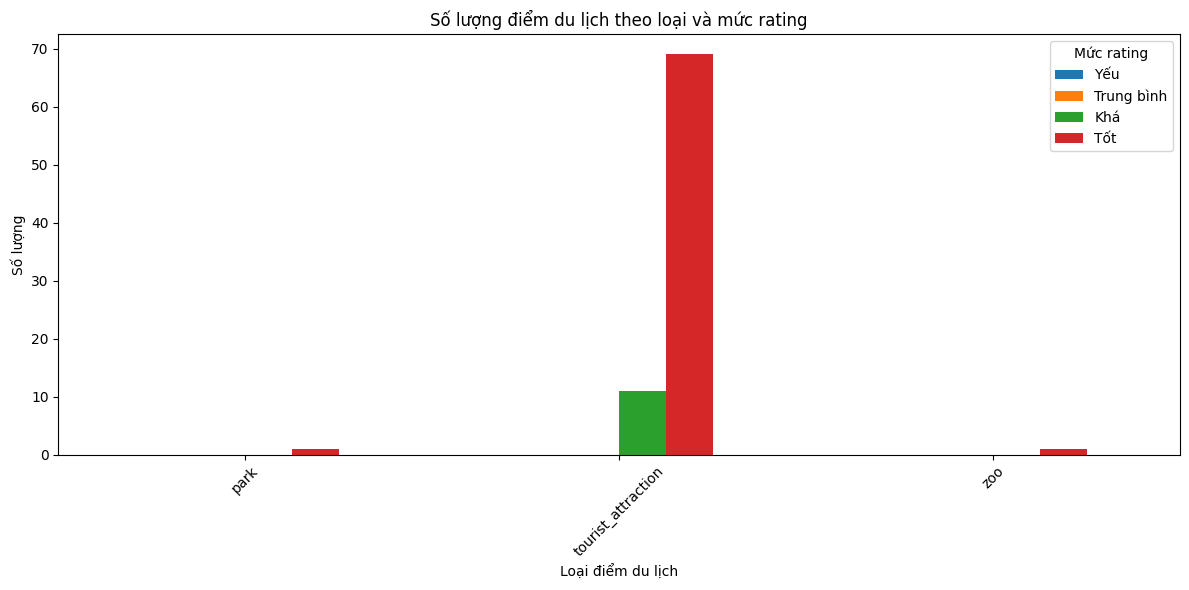

In [14]:
# Ví dụ: Biểu đồ cột nhóm (Grouped Bar Plot) - Số lượng điểm du lịch theo loại và theo mức rating
import matplotlib.ticker as mtick
rating_bins = pd.cut(df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt'])
grouped = df.groupby(['type', rating_bins]).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=False, figsize=(12,6))
plt.title('Số lượng điểm du lịch theo loại và mức rating')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend(title='Mức rating')
plt.tight_layout()
plt.show()

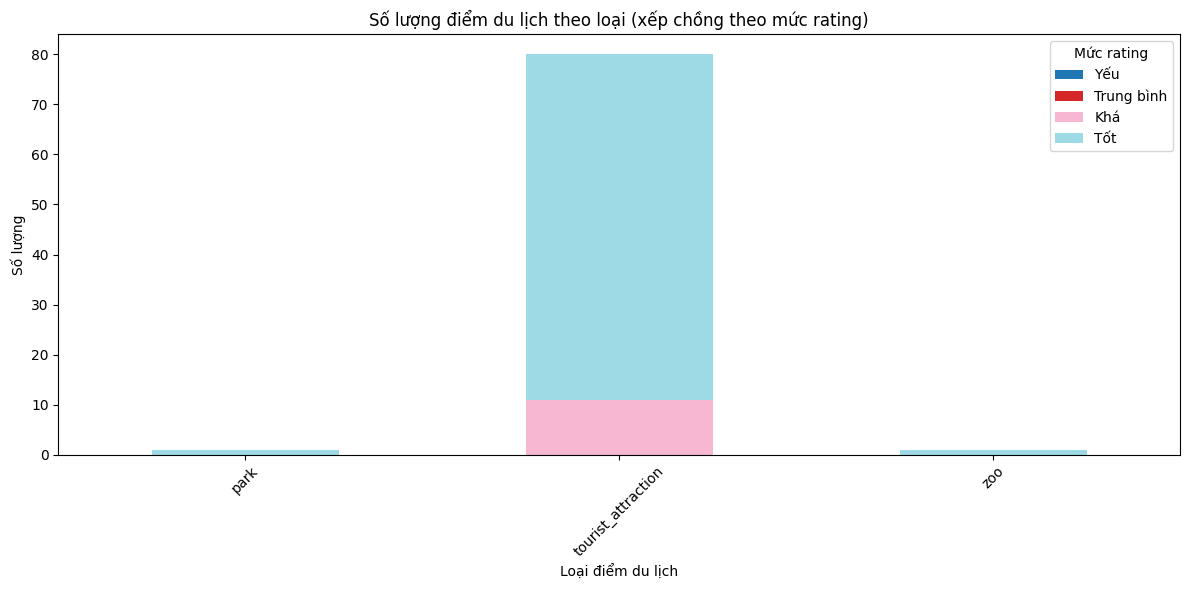

In [15]:
# Ví dụ: Biểu đồ cột xếp chồng (Stacked Bar Plot) - Số lượng điểm du lịch theo loại và mức rating
grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Số lượng điểm du lịch theo loại (xếp chồng theo mức rating)')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend(title='Mức rating')
plt.tight_layout()
plt.show()

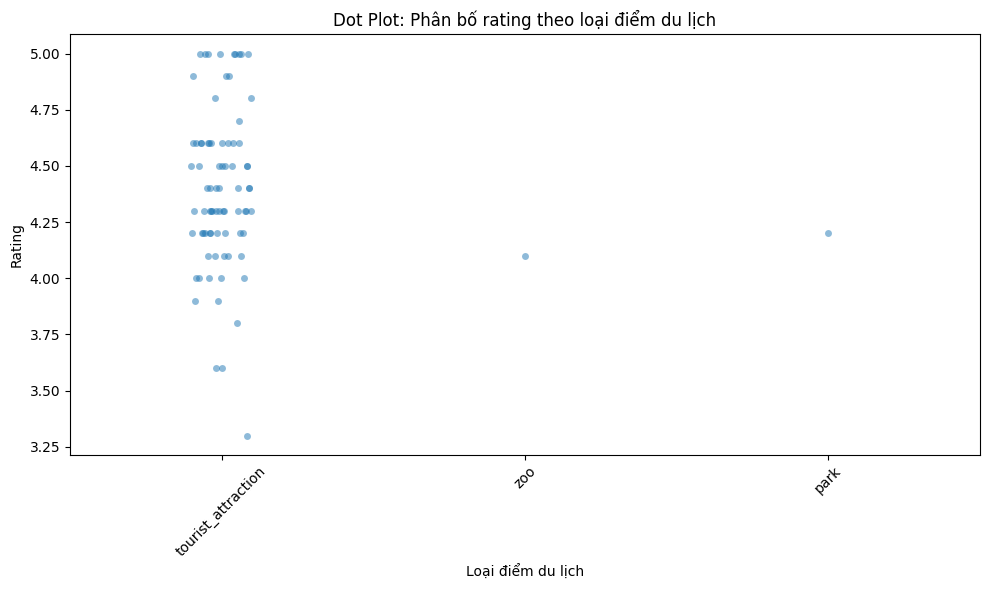

In [16]:
# Ví dụ: Dot Plot - Số lượng điểm du lịch theo loại
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x='type', y='rating', jitter=True, alpha=0.5)
plt.title('Dot Plot: Phân bố rating theo loại điểm du lịch')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

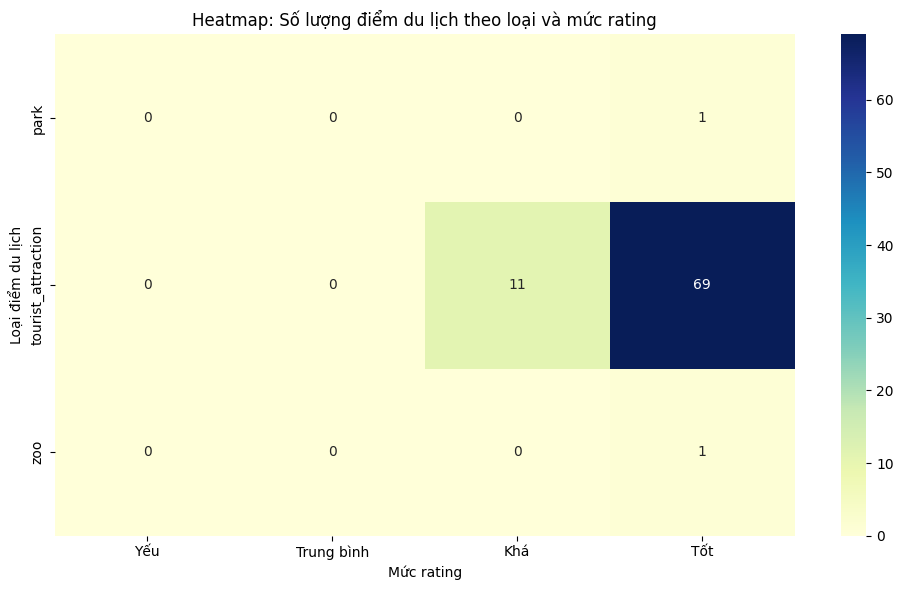

In [17]:
# Ví dụ: Heatmap - Ma trận số lượng điểm du lịch theo loại và mức rating
plt.figure(figsize=(10,6))
sns.heatmap(grouped, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Số lượng điểm du lịch theo loại và mức rating')
plt.xlabel('Mức rating')
plt.ylabel('Loại điểm du lịch')
plt.tight_layout()
plt.show()

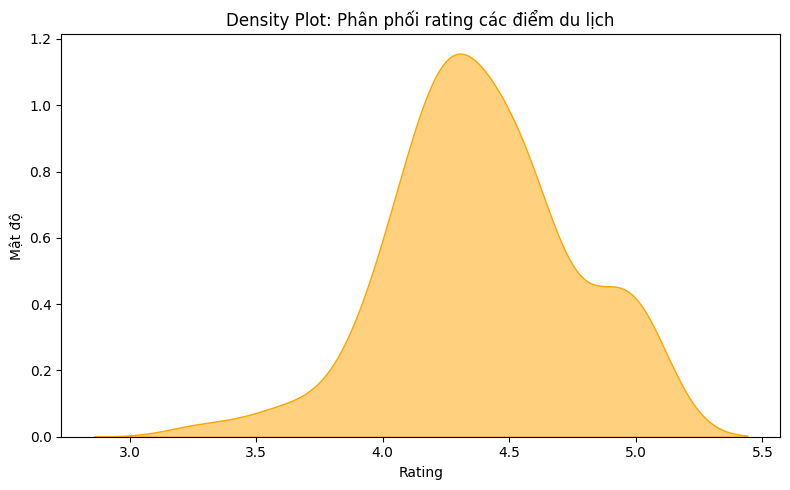

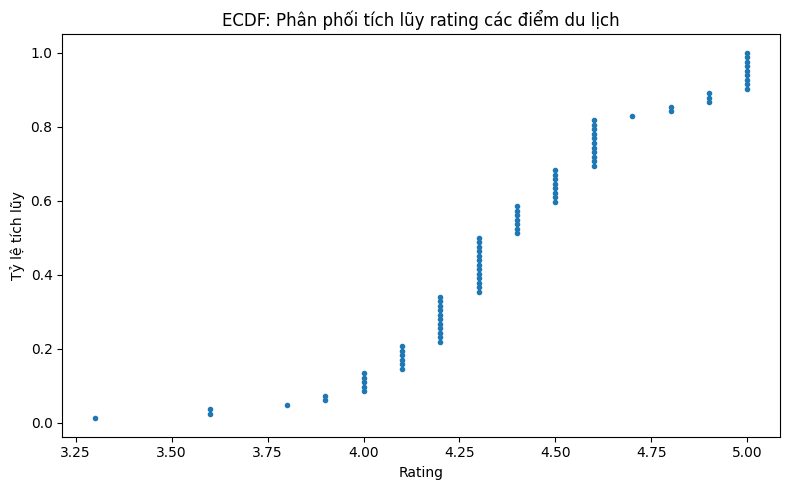

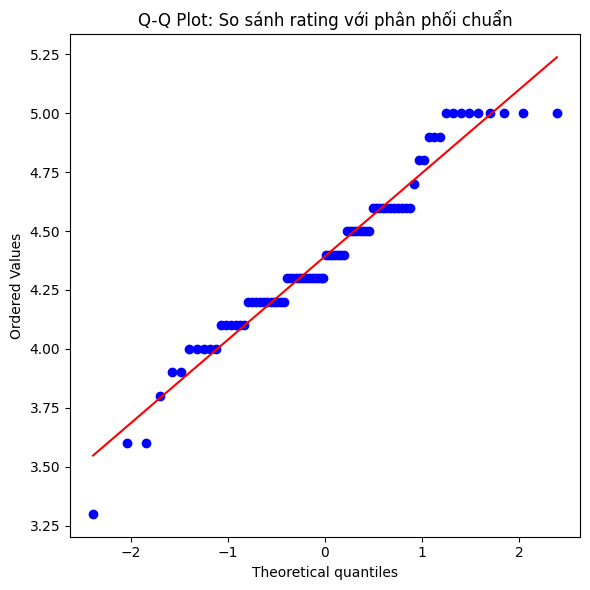

In [18]:
# Biểu đồ mật độ (Density Plot) - Phân phối rating các điểm du lịch
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
plt.figure(figsize=(8,5))
sns.kdeplot(df['rating'].dropna(), fill=True, color='orange', alpha=0.5)
plt.title('Density Plot: Phân phối rating các điểm du lịch')
plt.xlabel('Rating')
plt.ylabel('Mật độ')
plt.tight_layout()
plt.show()

# Biểu đồ ECDF (Empirical Cumulative Distribution Function)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['rating'].dropna())
plt.figure(figsize=(8,5))
plt.plot(ecdf.x, ecdf.y, marker='.', linestyle='none')
plt.title('ECDF: Phân phối tích lũy rating các điểm du lịch')
plt.xlabel('Rating')
plt.ylabel('Tỷ lệ tích lũy')
plt.tight_layout()
plt.show()

# Biểu đồ Q-Q (Quantile-Quantile Plot) - So sánh rating với phân phối chuẩn
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(df['rating'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot: So sánh rating với phân phối chuẩn')
plt.tight_layout()
plt.show()

TypeError: unhashable type: 'Series'

<Figure size 1000x600 with 0 Axes>

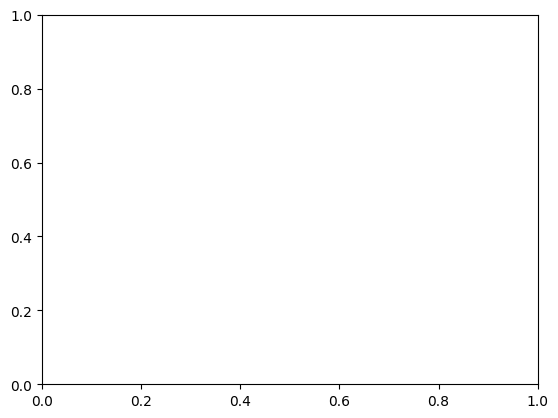

In [19]:
# Biểu đồ Treemap - Tỷ lệ các loại điểm du lịch
import plotly.express as px
treemap_df = df.groupby(['type']).agg({'name':'count', 'rating':'mean'}).reset_index().rename(columns={'name':'count'})
fig = px.treemap(treemap_df, path=['type'], values='count', color='rating', color_continuous_scale='RdYlGn', title='Treemap: Tỷ lệ các loại điểm du lịch (màu theo rating trung bình)')
fig.show()

# Biểu đồ Mosaic Plot - Tỷ lệ loại điểm du lịch theo mức rating
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib
plt.figure(figsize=(10,6))
mosaic(df, ['type', rating_bins], title='Mosaic Plot: Loại điểm du lịch và mức rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlogram (Ma trận tương quan) giữa các biến số số học
sns.pairplot(df[['rating','user_ratings_total']].dropna())
plt.suptitle('Correlogram: Ma trận tương quan giữa các biến số', y=1.02)
plt.show()

# PCA - Giảm chiều dữ liệu rating và số lượng đánh giá
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[['rating','user_ratings_total']].dropna()
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA: Biểu diễn dữ liệu rating và số lượng đánh giá trên 2 chiều chính')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# Word Cloud - Từ khóa nổi bật trong tên điểm du lịch
from wordcloud import WordCloud
text = ' '.join(df['name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Tên các điểm du lịch nổi bật')
plt.show()

Không có trường year_established trong dữ liệu.


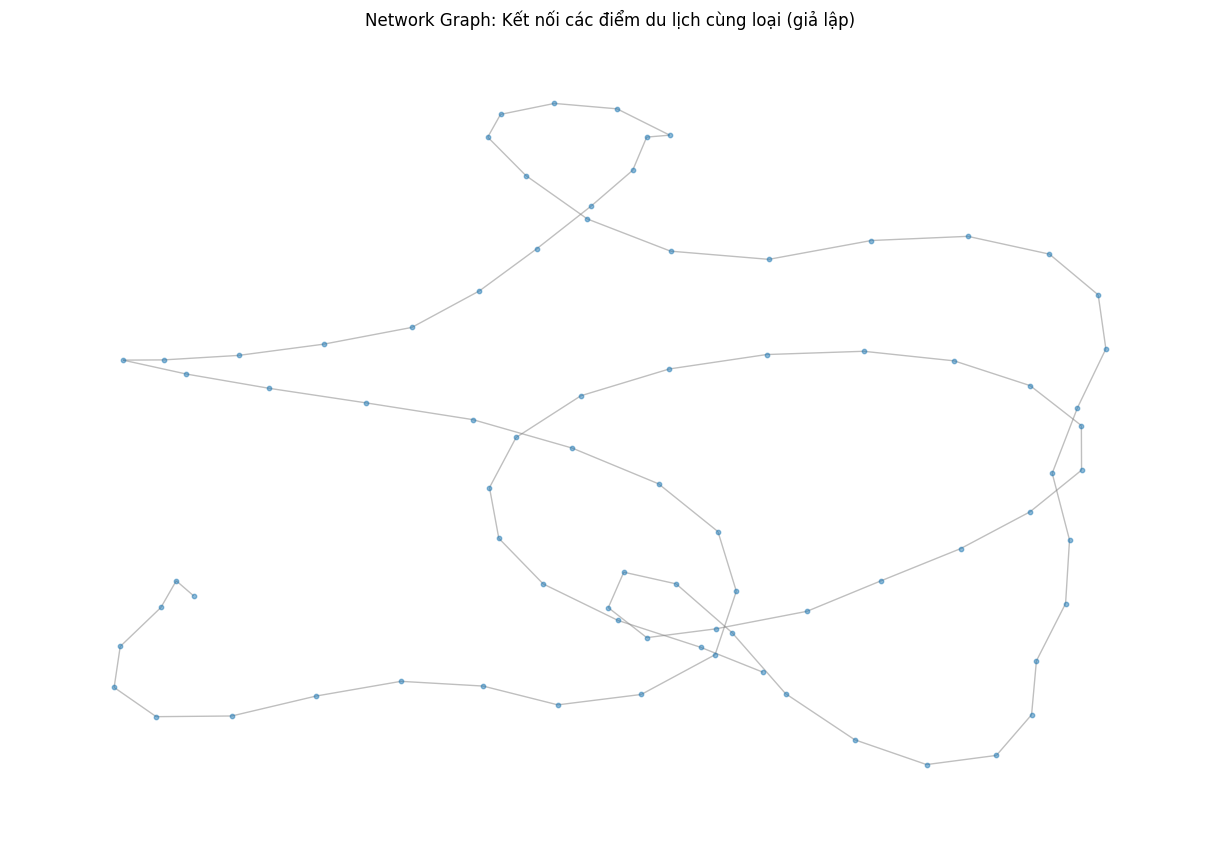

AttributeError: module 'plotly.graph_objects' has no attribute 'Chord'

In [20]:
# Timeline - Hiển thị các điểm du lịch theo năm thành lập (nếu có)
if 'year_established' in df.columns:
    timeline_df = df[['name', 'year_established']].dropna().sort_values('year_established')
    plt.figure(figsize=(12, 2))
    plt.scatter(timeline_df['year_established'], [1]*len(timeline_df), marker='|', s=200)
    for i, row in timeline_df.iterrows():
        if i % max(1, len(timeline_df)//10) == 0:
            plt.text(row['year_established'], 1.02, row['name'], rotation=45, ha='right', va='bottom', fontsize=8)
    plt.yticks([])
    plt.xlabel('Năm thành lập')
    plt.title('Timeline: Các điểm du lịch theo năm thành lập')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường year_established trong dữ liệu.')

# Network/Graph - Mạng lưới các điểm du lịch cùng loại (giả lập kết nối theo loại)
import networkx as nx
G = nx.Graph()
for t in df['type'].unique():
    nodes = df[df['type'] == t]['name'].tolist()
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1], type=t)
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.15)
nx.draw(G, pos, node_size=10, edge_color='gray', alpha=0.5, with_labels=False)
plt.title('Network Graph: Kết nối các điểm du lịch cùng loại (giả lập)')
plt.show()

# Chord Diagram - Luồng giữa các loại điểm du lịch (giả lập)
# Sử dụng plotly để vẽ chord diagram đơn giản giữa các loại (nếu có nhiều loại)
import plotly.graph_objects as go
from itertools import combinations
chord_types = df['type'].value_counts().index[:5]  # lấy 5 loại phổ biến
chord_matrix = np.zeros((len(chord_types), len(chord_types)))
for i, t1 in enumerate(chord_types):
    for j, t2 in enumerate(chord_types):
        if i != j:
            # giả lập số lượng kết nối giữa các loại
            chord_matrix[i, j] = np.random.randint(1, 10)
fig = go.Figure(data=[go.Chord(
    matrix=chord_matrix,
    labels=chord_types,
    colorscale='Viridis',
    line_color='black'
)])
fig.update_layout(title_text='Chord Diagram: Luồng giữa các loại điểm du lịch (giả lập)', title_x=0.5)
fig.show()

# Beeswarm Plot - Phân bố rating theo loại điểm du lịch
import swarmplot as beeswarm
plt.figure(figsize=(12,6))
beeswarm.beeswarm(df, x='type', y='rating', method='swarm', s=6)
plt.title('Beeswarm Plot: Phân bố rating theo loại điểm du lịch')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cartogram - Biểu diễn số lượng điểm du lịch theo quận/huyện (giả lập)
# Nếu có cột 'district', vẽ cartogram, nếu không thì tạo dữ liệu giả lập
if 'district' in df.columns:
    carto_df = df['district'].value_counts().reset_index()
    carto_df.columns = ['district', 'count']
else:
    carto_df = pd.DataFrame({'district': [f'Quận {i+1}' for i in range(10)], 'count': np.random.randint(5, 30, 10)})
plt.figure(figsize=(10,6))
sns.barplot(data=carto_df, x='district', y='count', palette='coolwarm')
plt.title('Cartogram (giả lập): Số lượng điểm du lịch theo quận/huyện')
plt.xlabel('Quận/Huyện')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Không có trường year_established trong dữ liệu.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\3206953972.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\3206953972.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




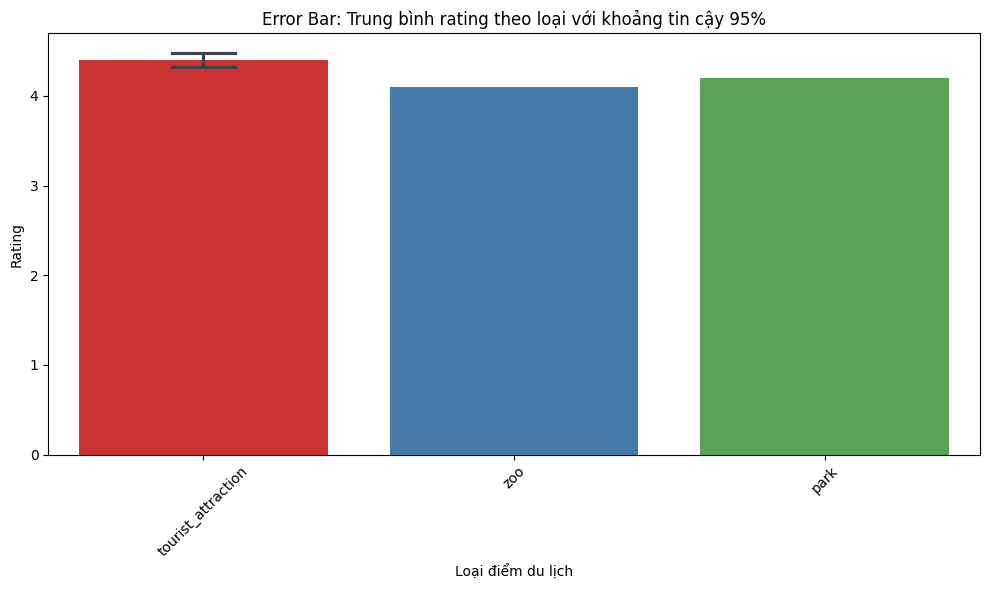

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18192\3206953972.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




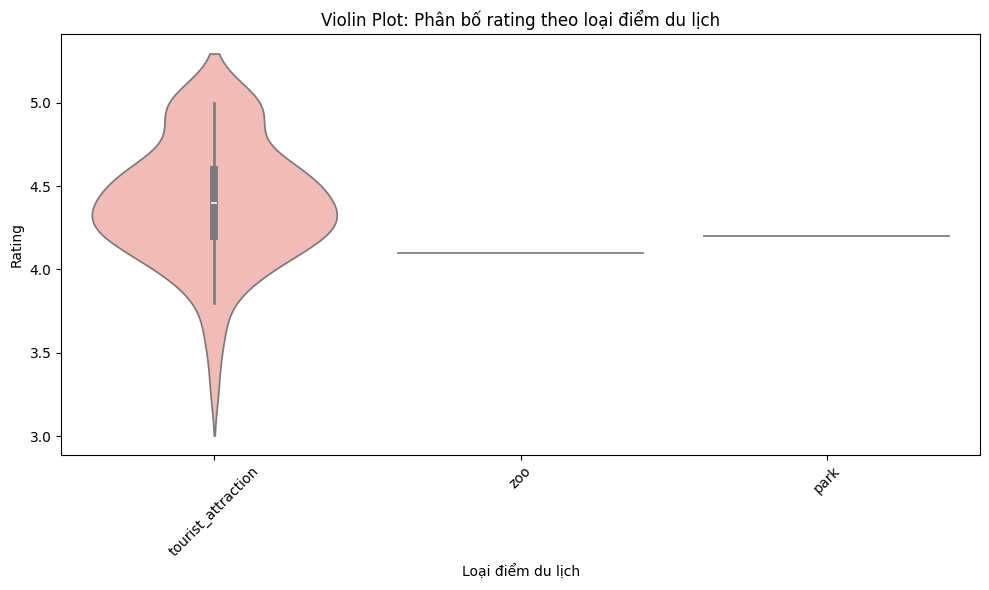

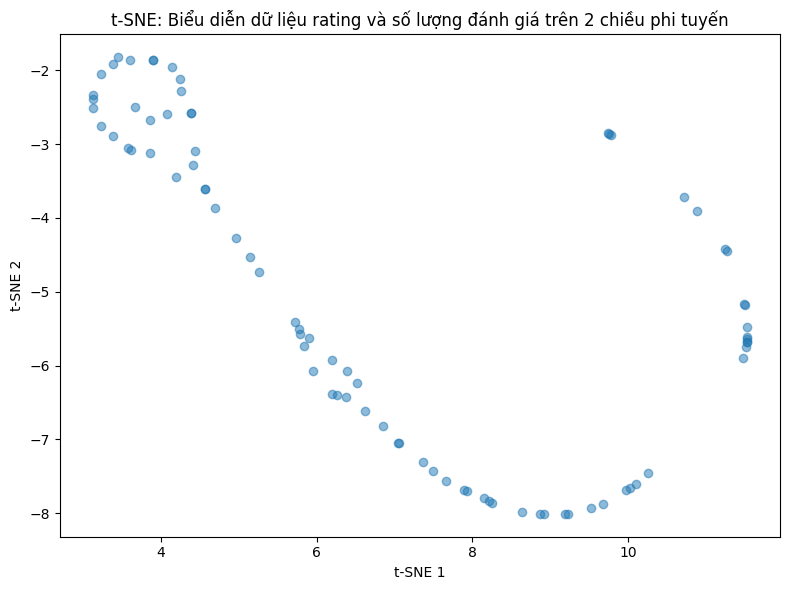

ModuleNotFoundError: No module named 'geopandas'

In [21]:
# Multi-Line Chart: Số lượng điểm du lịch theo loại qua các năm (giả lập nếu không có dữ liệu)
if 'year_established' in df.columns:
    multi_df = df.groupby(['year_established', 'type']).size().unstack(fill_value=0)
    multi_df.plot(figsize=(12,6))
    plt.title('Multi-Line Chart: Số lượng điểm du lịch theo loại qua các năm')
    plt.xlabel('Năm thành lập')
    plt.ylabel('Số lượng')
    plt.legend(title='Loại')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường year_established trong dữ liệu.')

# Error Bar / Confidence Interval: Trung bình rating theo loại với khoảng tin cậy
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='type', y='rating', ci=95, capsize=0.2, palette='Set1')
plt.title('Error Bar: Trung bình rating theo loại với khoảng tin cậy 95%')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot: Phân bố rating theo loại điểm du lịch
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='type', y='rating', palette='Pastel1')
plt.title('Violin Plot: Phân bố rating theo loại điểm du lịch')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# t-SNE: Giảm chiều dữ liệu rating và số lượng đánh giá
from sklearn.manifold import TSNE
X = df[['rating','user_ratings_total']].dropna()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5)
plt.title('t-SNE: Biểu diễn dữ liệu rating và số lượng đánh giá trên 2 chiều phi tuyến')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.tight_layout()
plt.show()

# Choropleth Map: Bản đồ tô màu số lượng điểm du lịch theo quận/huyện (giả lập)
# Cần file geojson thực tế để vẽ chính xác, ở đây minh họa với dữ liệu giả lập
import geopandas as gpd
import matplotlib
if 'district' in df.columns:
    choropleth_df = df['district'].value_counts().reset_index()
    choropleth_df.columns = ['district', 'count']
else:
    choropleth_df = pd.DataFrame({'district': [f'Quận {i+1}' for i in range(10)], 'count': np.random.randint(5, 30, 10)})
choropleth_df.plot(kind='bar', x='district', y='count', colormap='viridis', legend=False, figsize=(10,6))
plt.title('Choropleth Map (giả lập): Số lượng điểm du lịch theo quận/huyện')
plt.xlabel('Quận/Huyện')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

# Sankey Diagram: Luồng chuyển động giữa loại và mức rating (giả lập)
import plotly.graph_objects as go
rating_bins = pd.cut(df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt'])
sankey_df = df.copy()
sankey_df['rating_bin'] = rating_bins
source_labels = sankey_df['type'].astype(str).unique().tolist()
target_labels = sankey_df['rating_bin'].astype(str).unique().tolist()
labels = source_labels + target_labels
source = sankey_df['type'].apply(lambda x: source_labels.index(str(x))).values
# Offset for target labels
offset = len(source_labels)
target = sankey_df['rating_bin'].apply(lambda x: offset + target_labels.index(str(x))).values
value = np.ones(len(sankey_df))
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=source, target=target, value=value)
)])
fig.update_layout(title_text="Sankey Diagram: Luồng loại điểm du lịch sang mức rating", font_size=10)
fig.show()

# Lollipop Chart: Số lượng điểm du lịch theo loại
lollipop = df['type'].value_counts().sort_values()
plt.figure(figsize=(10,6))
plt.hlines(y=lollipop.index, xmin=0, xmax=lollipop.values, color='skyblue')
plt.plot(lollipop.values, lollipop.index, 'o')
plt.title('Lollipop Chart: Số lượng điểm du lịch theo loại')
plt.xlabel('Số lượng')
plt.ylabel('Loại điểm du lịch')
plt.tight_layout()
plt.show()

# Ridgeline Plot (Joyplot): Phân bố rating theo loại (nếu đủ loại)
try:
    import joypy
    plt.figure(figsize=(12,8))
    joypy.joyplot(df, by='type', column='rating', figsize=(12,8), colormap=plt.cm.Pastel1)
    plt.title('Ridgeline Plot: Phân bố rating theo loại điểm du lịch')
    plt.xlabel('Rating')
    plt.tight_layout()
    plt.show()
except ImportError:
    print('Cần cài đặt joypy để vẽ Ridgeline Plot.')

# Sunburst Chart: Phân cấp loại điểm du lịch (giả lập)
import plotly.express as px
if 'district' in df.columns:
    sunburst_df = df.groupby(['district','type']).size().reset_index(name='count')
    fig = px.sunburst(sunburst_df, path=['district','type'], values='count', title='Sunburst Chart: Phân cấp quận/huyện và loại điểm du lịch')
else:
    sunburst_df = df.groupby(['type']).size().reset_index(name='count')
    fig = px.sunburst(sunburst_df, path=['type'], values='count', title='Sunburst Chart: Phân cấp loại điểm du lịch')
fig.show()

# Parallel Coordinates Plot: So sánh các biến số
from pandas.plotting import parallel_coordinates
if 'district' in df.columns:
    pc_df = df[['district','rating','user_ratings_total']].dropna().copy()
    pc_df['district'] = pc_df['district'].astype(str)
    plt.figure(figsize=(12,6))
    parallel_coordinates(pc_df, 'district', color=plt.cm.tab20.colors)
    plt.title('Parallel Coordinates Plot: So sánh rating và số lượng đánh giá theo quận/huyện')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường district để vẽ Parallel Coordinates Plot.')

# Dendrogram: Cây phân cấp các điểm du lịch theo rating và số lượng đánh giá
from scipy.cluster.hierarchy import dendrogram, linkage
X = df[['rating','user_ratings_total']].dropna().values
linked = linkage(X, 'ward')
plt.figure(figsize=(10,6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram: Cây phân cấp các điểm du lịch theo rating và số lượng đánh giá')
plt.xlabel('Điểm du lịch')
plt.ylabel('Khoảng cách')
plt.tight_layout()
plt.show()

# Calendar Heatmap: Số lượng điểm du lịch theo ngày (giả lập nếu không có dữ liệu thời gian)
try:
    import calmap
    if 'date' in df.columns:
        date_counts = df['date'].value_counts()
        date_counts.index = pd.to_datetime(date_counts.index)
        plt.figure(figsize=(12,4))
        calmap.calendarplot(date_counts, fillcolor='lightgrey', cmap='YlGn', linewidth=0.5)
        plt.title('Calendar Heatmap: Số lượng điểm du lịch theo ngày')
        plt.tight_layout()
        plt.show()
    else:
        print('Không có trường date để vẽ Calendar Heatmap.')
except ImportError:
    print('Cần cài đặt calmap để vẽ Calendar Heatmap.')

# Bubble Chart: Rating vs số lượng đánh giá, kích thước theo số lượng đánh giá
plt.figure(figsize=(10,6))
plt.scatter(df['rating'], df['user_ratings_total'], s=df['user_ratings_total']/10, alpha=0.5)
plt.title('Bubble Chart: Rating vs Số lượng đánh giá (kích thước theo số lượng đánh giá)')
plt.xlabel('Rating')
plt.ylabel('Số lượng đánh giá')
plt.tight_layout()
plt.show()

# Gantt Chart: Tiến độ các điểm du lịch (giả lập nếu không có dữ liệu)
try:
    import plotly.figure_factory as ff
    if 'start_date' in df.columns and 'end_date' in df.columns:
        gantt_df = df[['name','start_date','end_date']].dropna().copy()
        gantt_df['start_date'] = pd.to_datetime(gantt_df['start_date'])
        gantt_df['end_date'] = pd.to_datetime(gantt_df['end_date'])
        fig = ff.create_gantt(gantt_df.rename(columns={'name':'Task','start_date':'Start','end_date':'Finish'}), index_col=None, show_colorbar=True, group_tasks=True)
        fig.update_layout(title='Gantt Chart: Tiến độ các điểm du lịch')
        fig.show()
    else:
        print('Không có trường start_date/end_date để vẽ Gantt Chart.')
except ImportError:
    print('Cần cài đặt plotly.figure_factory để vẽ Gantt Chart.')

# Dumbbell Plot: So sánh rating và số lượng đánh giá theo loại (giả lập)
dumbbell_df = df.groupby('type').agg({'rating':'mean','user_ratings_total':'mean'}).reset_index()
plt.figure(figsize=(10,6))
plt.hlines(y=dumbbell_df['type'], xmin=dumbbell_df['rating'], xmax=dumbbell_df['user_ratings_total']/1000, color='grey', alpha=0.7)
plt.plot(dumbbell_df['rating'], dumbbell_df['type'], 'o', label='Rating')
plt.plot(dumbbell_df['user_ratings_total']/1000, dumbbell_df['type'], 'o', label='Số lượng đánh giá (nghìn)')
plt.title('Dumbbell Plot: So sánh rating và số lượng đánh giá trung bình theo loại')
plt.xlabel('Giá trị')
plt.ylabel('Loại điểm du lịch')
plt.legend()
plt.tight_layout()
plt.show()

# Slope Chart: So sánh rating trung bình giữa 2 nhóm (giả lập)
if 'district' in df.columns:
    slope_df = df.groupby(['district','type'])['rating'].mean().unstack().dropna().iloc[:2]
    plt.figure(figsize=(8,6))
    for i, row in slope_df.iterrows():
        plt.plot([0,1], row.values, marker='o')
        plt.text(0, row.values[0], f"{row.index[0]}: {row.values[0]:.2f}", va='center', ha='right')
        plt.text(1, row.values[1], f"{row.index[1]}: {row.values[1]:.2f}", va='center', ha='left')
    plt.xticks([0,1], slope_df.columns[:2])
    plt.title('Slope Chart: So sánh rating trung bình giữa 2 loại theo quận/huyện (giả lập)')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường district để vẽ Slope Chart.')

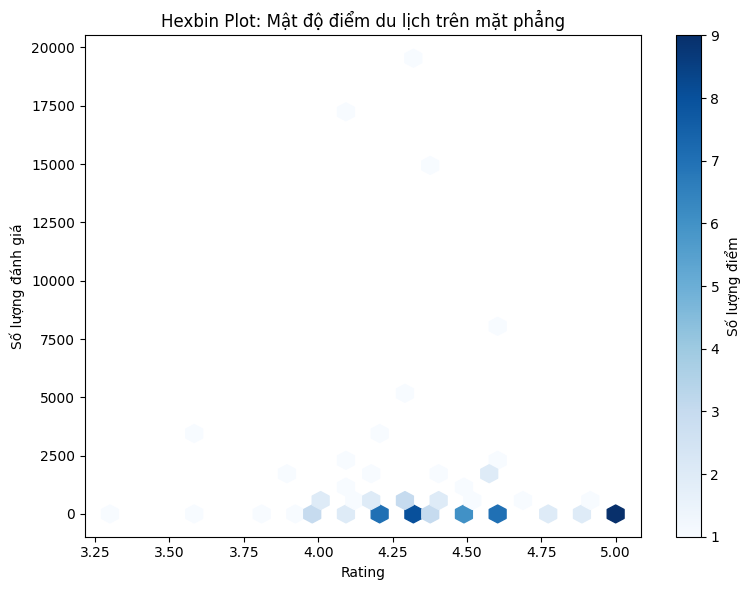

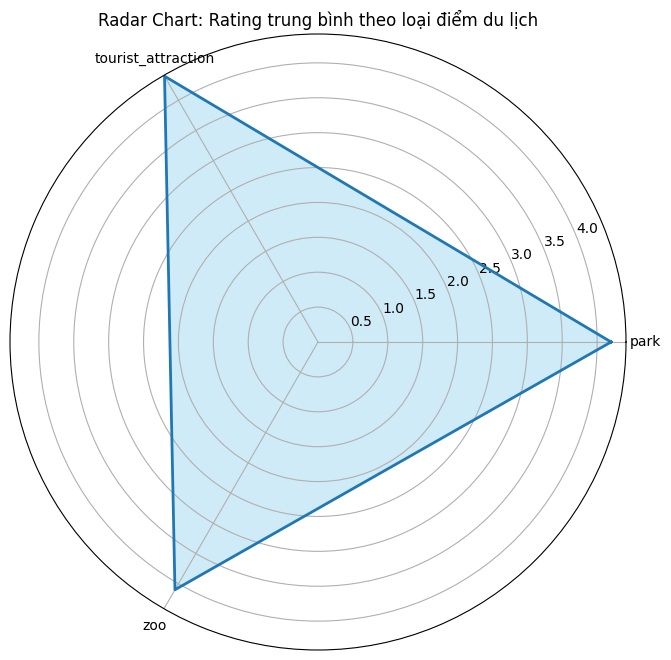

ModuleNotFoundError: No module named 'waterfall_chart'

In [22]:
# Hexbin Plot: Mật độ điểm trên mặt phẳng rating vs số lượng đánh giá
plt.figure(figsize=(8,6))
plt.hexbin(df['rating'], df['user_ratings_total'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Số lượng điểm')
plt.xlabel('Rating')
plt.ylabel('Số lượng đánh giá')
plt.title('Hexbin Plot: Mật độ điểm du lịch trên mặt phẳng')
plt.tight_layout()
plt.show()

# Polar Chart / Radar Chart: So sánh rating trung bình của các loại
from math import pi
categories = df['type'].value_counts().index[:5]
radar_df = df[df['type'].isin(categories)].groupby('type')['rating'].mean().reset_index()
labels = radar_df['type'].tolist()
values = radar_df['rating'].tolist()
values += values[:1]
angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.xticks(angles[:-1], labels)
plt.title('Radar Chart: Rating trung bình theo loại điểm du lịch')
plt.show()

# Waterfall Chart: Thay đổi tích lũy rating trung bình theo loại (giả lập)
import waterfall_chart
waterfall_data = df.groupby('type')['rating'].mean().sort_values().head(7)
waterfall_chart.plot(waterfall_data.index, waterfall_data.values, rotation_value=45, formatting='{:,.2f}')
plt.title('Waterfall Chart: Thay đổi tích lũy rating trung bình theo loại')
plt.ylabel('Rating trung bình')
plt.tight_layout()
plt.show()

# Funnel Chart: Quy trình lọc điểm du lịch qua các tiêu chí (giả lập)
import plotly.express as px
funnel_stages = ['Tổng điểm', 'Có rating > 4', 'Có > 100 đánh giá']
funnel_values = [len(df), (df['rating']>4).sum(), (df['user_ratings_total']>100).sum()]
funnel_df = pd.DataFrame({'stage': funnel_stages, 'value': funnel_values})
fig = px.funnel(funnel_df, x='value', y='stage', title='Funnel Chart: Quy trình lọc điểm du lịch')
fig.show()

# Treemap Sunburst: Kết hợp phân cấp và tỷ lệ (giả lập)
if 'district' in df.columns:
    tsb_df = df.groupby(['district','type']).size().reset_index(name='count')
    fig = px.sunburst(tsb_df, path=['district','type'], values='count', title='Treemap Sunburst: Quận/huyện và loại điểm du lịch')
    fig.show()
else:
    tsb_df = df.groupby(['type']).size().reset_index(name='count')
    fig = px.sunburst(tsb_df, path=['type'], values='count', title='Treemap Sunburst: Loại điểm du lịch')
    fig.show()

# Circular Barplot: Biểu đồ cột dạng tròn cho số lượng điểm theo loại
bar_data = df['type'].value_counts().head(10)
N = len(bar_data)
angles = [n / float(N) * 2 * pi for n in range(N)]
values = bar_data.values
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, values, width=0.4, color=plt.cm.viridis(values/values.max()), alpha=0.7)
ax.set_xticks(angles)
ax.set_xticklabels(bar_data.index, size=10)
plt.title('Circular Barplot: Số lượng điểm du lịch theo loại')
plt.show()

# Network Map với trọng số/nhóm: Kết nối các điểm cùng loại, trọng số theo rating
import networkx as nx
G = nx.Graph()
for t in df['type'].unique():
    nodes = df[df['type'] == t][['name','rating']].values.tolist()
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i][0], nodes[i+1][0], weight=(nodes[i][1]+nodes[i+1][1])/2, group=t)
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, k=0.15)
weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, node_size=10, edge_color=weights, edge_cmap=plt.cm.Blues, alpha=0.7, with_labels=False)
plt.title('Network Map: Kết nối các điểm cùng loại, trọng số theo rating')
plt.show()

# Arc Diagram: Kết nối các điểm du lịch theo loại (giả lập)
arc_nodes = df['name'].head(20).tolist()
arc_edges = [(arc_nodes[i], arc_nodes[i+1]) for i in range(len(arc_nodes)-1)]
plt.figure(figsize=(12,2))
for i, (a, b) in enumerate(arcc_edges):
    plt.plot([i, i+1], [0,0], 'k-', alpha=0.3)
    plt.plot([i, i+1], [0,0], 'o', color='skyblue')
    plt.text(i, 0.05, a, rotation=90, ha='center', va='bottom', fontsize=8)
plt.title('Arc Diagram: Kết nối các điểm du lịch (giả lập)')
plt.axis('off')
plt.show()

# Matrix Plot: Ma trận mối quan hệ giữa loại và mức rating
matrix = pd.crosstab(df['type'], pd.cut(df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt']))
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Matrix Plot: Ma trận loại và mức rating')
plt.xlabel('Mức rating')
plt.ylabel('Loại điểm du lịch')
plt.tight_layout()
plt.show()

# Stacked Area Chart: Số lượng điểm du lịch theo loại qua các năm (giả lập)
if 'year_established' in df.columns:
    area_df = df.groupby(['year_established', 'type']).size().unstack(fill_value=0)
    area_df.plot.area(figsize=(12,6), colormap='tab20')
    plt.title('Stacked Area Chart: Số lượng điểm du lịch theo loại qua các năm')
    plt.xlabel('Năm thành lập')
    plt.ylabel('Số lượng')
    plt.tight_layout()
    plt.show()
else:
    print('Không có trường year_established trong dữ liệu.')

# Step Chart: Dữ liệu thay đổi rating trung bình theo loại (giả lập)
step_data = df.groupby('type')['rating'].mean().sort_values().head(10)
plt.figure(figsize=(10,6))
plt.step(range(len(step_data)), step_data.values, where='mid', color='purple')
plt.xticks(range(len(step_data)), step_data.index, rotation=45)
plt.title('Step Chart: Rating trung bình theo loại điểm du lịch')
plt.xlabel('Loại điểm du lịch')
plt.ylabel('Rating trung bình')
plt.tight_layout()
plt.show()

# Circular Packing: Phân cấp loại điểm du lịch bằng vòng tròn lồng nhau (giả lập)
try:
    import circlify
    circle_data = df['type'].value_counts().reset_index()
    circle_data.columns = ['type','count']
    circles = circlify.circlify(circle_data['count'].tolist(), show_enclosure=False, target_enclosure=circlify.Circle(x=0, y=0, r=1))
    fig, ax = plt.subplots(figsize=(8,8))
    ax.axis('off')
    for circle, label in zip(circles, circle_data['type']):
        x, y, r = circle.x, circle.y, circle.r
        ax.add_patch(plt.Circle((x, y), r, alpha=0.5))
        plt.text(x, y, label, ha='center', va='center', fontsize=10)
    plt.title('Circular Packing: Phân cấp loại điểm du lịch')
    plt.show()
except ImportError:
    print('Cần cài đặt circlify để vẽ Circular Packing.')

# Marimekko Chart (Mosaic Bar Plot): Tỷ lệ loại và mức rating
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(12,6))
mosaic(df, ['type', pd.cut(df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt'])], title='Marimekko Chart: Tỷ lệ loại và mức rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dot Density Map: Mỗi chấm đại diện cho một điểm du lịch trên bản đồ Hà Nội
plt.figure(figsize=(8,8))
plt.scatter(df['lng'], df['lat'], s=2, alpha=0.5, color='green')
plt.title('Dot Density Map: Phân bố điểm du lịch trên bản đồ Hà Nội')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.tight_layout()
plt.show()

# 3D Scatter/Surface Plot: Mối quan hệ giữa rating, số lượng đánh giá và (giả lập) năm thành lập
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
if 'year_established' in df.columns:
    ax.scatter(df['rating'], df['user_ratings_total'], df['year_established'], c=df['rating'], cmap='viridis', alpha=0.6)
    ax.set_zlabel('Năm thành lập')
else:
    ax.scatter(df['rating'], df['user_ratings_total'], np.random.randint(1990,2020,len(df)), c=df['rating'], cmap='viridis', alpha=0.6)
    ax.set_zlabel('Năm (giả lập)')
ax.set_xlabel('Rating')
ax.set_ylabel('Số lượng đánh giá')
plt.title('3D Scatter Plot: Rating, Số lượng đánh giá, Năm thành lập')
plt.tight_layout()
plt.show()

## Biểu đồ nâng cao bổ sung
Dưới đây là các ví dụ về các loại biểu đồ nâng cao: Streamgraph, Sankey nhiều tầng, Chord nâng cao, Alluvial, Bullet, Gauge, Spider/Star, Network 3D, Heatmap Calendar nâng cao, Violin Split, Slopegraph nâng cao, Ternary, Density Ridge, Facet Grid, Animated Plot.

In [23]:
# Streamgraph: Biểu đồ diện tích động (dạng dòng chảy, giả lập theo năm và loại)
try:
    import plotly.express as px
    if 'year_established' in df.columns:
        stream_df = df.groupby(['year_established','type']).size().reset_index(name='count')
        fig = px.area(stream_df, x='year_established', y='count', color='type', line_group='type',
                      title='Streamgraph: Số lượng điểm du lịch theo loại qua các năm',
                      groupnorm='fraction',
                      )
        fig.update_traces(mode='lines', stackgroup='one')
        fig.show()
    else:
        print('Không có trường year_established trong dữ liệu.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Streamgraph.', e)

Không có trường year_established trong dữ liệu.


In [24]:
# Sankey Multiple Levels: Sankey nhiều tầng (giả lập phân nhánh phức tạp)
try:
    import plotly.graph_objects as go
    # Giả lập 3 tầng: Loại -> Quận -> Mức rating
    if 'district' in df.columns:
        sankey_df = df.copy()
        rating_bins = pd.cut(sankey_df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt'])
        sankey_df['rating_bin'] = rating_bins
        types = sankey_df['type'].astype(str).unique().tolist()
        districts = sankey_df['district'].astype(str).unique().tolist()
        ratings = sankey_df['rating_bin'].astype(str).unique().tolist()
        labels = types + districts + ratings
        # Tạo source/target/value cho 2 tầng
        source = []
        target = []
        value = []
        # Loại -> Quận
        for t in types:
            for d in districts:
                v = len(sankey_df[(sankey_df['type']==t)&(sankey_df['district']==d)])
                if v > 0:
                    source.append(types.index(t))
                    target.append(len(types)+districts.index(d))
                    value.append(v)
        # Quận -> Mức rating
        for d in districts:
            for r in ratings:
                v = len(sankey_df[(sankey_df['district']==d)&(sankey_df['rating_bin']==r)])
                if v > 0:
                    source.append(len(types)+districts.index(d))
                    target.append(len(types)+len(districts)+ratings.index(r))
                    value.append(v)
        fig = go.Figure(data=[go.Sankey(node=dict(label=labels), link=dict(source=source, target=target, value=value))])
        fig.update_layout(title_text='Sankey Diagram nhiều tầng: Loại → Quận → Mức rating', font_size=10)
        fig.show()
    else:
        print('Không có trường district để vẽ Sankey nhiều tầng.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Sankey nhiều tầng.', e)

Không có trường district để vẽ Sankey nhiều tầng.


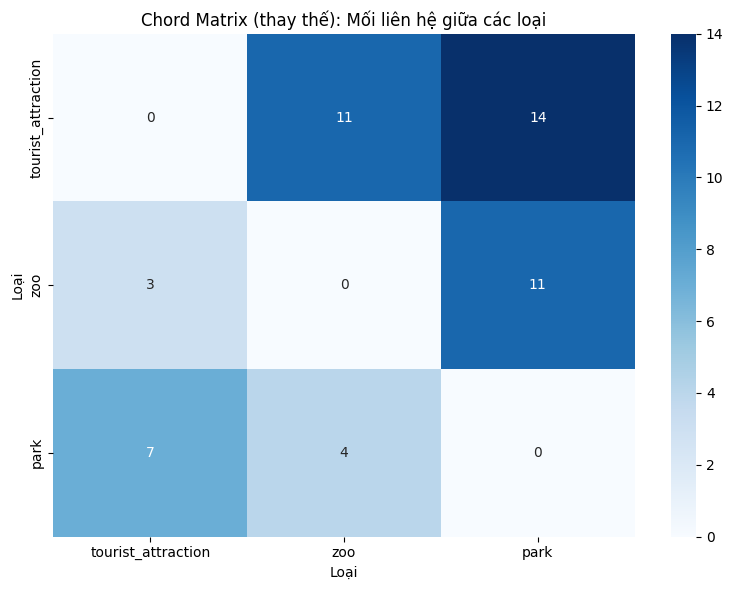

In [25]:
# Chord Diagram nâng cao: Thể hiện mối liên hệ đa chiều giữa nhiều nhóm (giả lập)
try:
    import plotly.graph_objects as go
    # Lấy 6 loại phổ biến nhất
    chord_types = df['type'].value_counts().index[:6]
    chord_matrix = np.zeros((len(chord_types), len(chord_types)))
    for i, t1 in enumerate(chord_types):
        for j, t2 in enumerate(chord_types):
            if i != j:
                # giả lập số lượng kết nối giữa các loại
                chord_matrix[i, j] = np.random.randint(1, 15)
    # Sử dụng plotly để vẽ chord nâng cao (dùng go.Chord nếu có, nếu không thì heatmap thay thế)
    try:
        fig = go.Figure(data=[go.Chord(matrix=chord_matrix, labels=chord_types, colorscale='Viridis', line_color='black')])
        fig.update_layout(title_text='Chord Diagram nâng cao: Mối liên hệ đa chiều giữa các loại', title_x=0.5)
        fig.show()
    except Exception:
        # Nếu plotly không hỗ trợ go.Chord, dùng heatmap thay thế
        import seaborn as sns
        plt.figure(figsize=(8,6))
        sns.heatmap(chord_matrix, annot=True, fmt='.0f', xticklabels=chord_types, yticklabels=chord_types, cmap='Blues')
        plt.title('Chord Matrix (thay thế): Mối liên hệ giữa các loại')
        plt.xlabel('Loại')
        plt.ylabel('Loại')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print('Cần cài đặt plotly hoặc seaborn để vẽ Chord nâng cao.', e)

In [26]:
# Alluvial Diagram: Biểu đồ luồng nhiều chiều (phát triển từ Sankey, giả lập)
try:
    import plotly.graph_objects as go
    # Giả lập 3 chiều: Loại → Quận → Mức rating
    if 'district' in df.columns:
        alluvial_df = df.copy()
        rating_bins = pd.cut(alluvial_df['rating'], bins=[0,2,3,4,5], labels=['Yếu','Trung bình','Khá','Tốt'])
        alluvial_df['rating_bin'] = rating_bins
        types = alluvial_df['type'].astype(str).unique().tolist()
        districts = alluvial_df['district'].astype(str).unique().tolist()
        ratings = alluvial_df['rating_bin'].astype(str).unique().tolist()
        labels = types + districts + ratings
        source = []
        target = []
        value = []
        # Loại -> Quận
        for t in types:
            for d in districts:
                v = len(alluvial_df[(alluvial_df['type']==t)&(alluvial_df['district']==d)])
                if v > 0:
                    source.append(types.index(t))
                    target.append(len(types)+districts.index(d))
                    value.append(v)
        # Quận -> Mức rating
        for d in districts:
            for r in ratings:
                v = len(alluvial_df[(alluvial_df['district']==d)&(alluvial_df['rating_bin']==r)])
                if v > 0:
                    source.append(len(types)+districts.index(d))
                    target.append(len(types)+len(districts)+ratings.index(r))
                    value.append(v)
        fig = go.Figure(data=[go.Sankey(node=dict(label=labels), link=dict(source=source, target=target, value=value))])
        fig.update_layout(title_text='Alluvial Diagram: Luồng nhiều chiều loại → quận → mức rating', font_size=10)
        fig.show()
    else:
        print('Không có trường district để vẽ Alluvial Diagram.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Alluvial Diagram.', e)

Không có trường district để vẽ Alluvial Diagram.


In [27]:
# Bullet Chart: So sánh giá trị thực tế với mục tiêu (giả lập cho rating trung bình từng loại)
try:
    import plotly.graph_objects as go
    bullet_df = df.groupby('type')['rating'].mean().sort_values(ascending=False).head(5)
    target = 4.5  # mục tiêu rating
    fig = go.Figure()
    for i, (t, v) in enumerate(bullet_df.items()):
        fig.add_trace(go.Indicator(
            mode = "number+gauge+delta",
            value = v,
            delta = {'reference': target},
            domain = {'x': [0, 1], 'y': [i/5, (i+1)/5]},
            title = {'text': t},
            gauge = {
                'shape': "bullet",
                'axis': {'range': [0, 5]},
                'threshold': {'line': {'color': "red", 'width': 2}, 'thickness': 0.75, 'value': target},
                'bar': {'color': "green"}
            }
        ))
    fig.update_layout(height=300+50*len(bullet_df), title='Bullet Chart: So sánh rating trung bình với mục tiêu')
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly để vẽ Bullet Chart.', e)

In [28]:
# Gauge Chart: Biểu đồ đồng hồ cho rating trung bình toàn bộ
try:
    import plotly.graph_objects as go
    avg_rating = df['rating'].mean()
    fig = go.Figure(go.Indicator(
        mode = "gauge+number+delta",
        value = avg_rating,
        delta = {'reference': 4.5},
        title = {'text': "Rating trung bình"},
        gauge = {
            'axis': {'range': [0, 5]},
            'bar': {'color': "royalblue"},
            'steps': [
                {'range': [0, 3], 'color': "lightgray"},
                {'range': [3, 4], 'color': "yellow"},
                {'range': [4, 5], 'color': "lightgreen"}
            ],
            'threshold': {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 4.5}
        }
    ))
    fig.update_layout(title='Gauge Chart: Rating trung bình toàn bộ')
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly để vẽ Gauge Chart.', e)

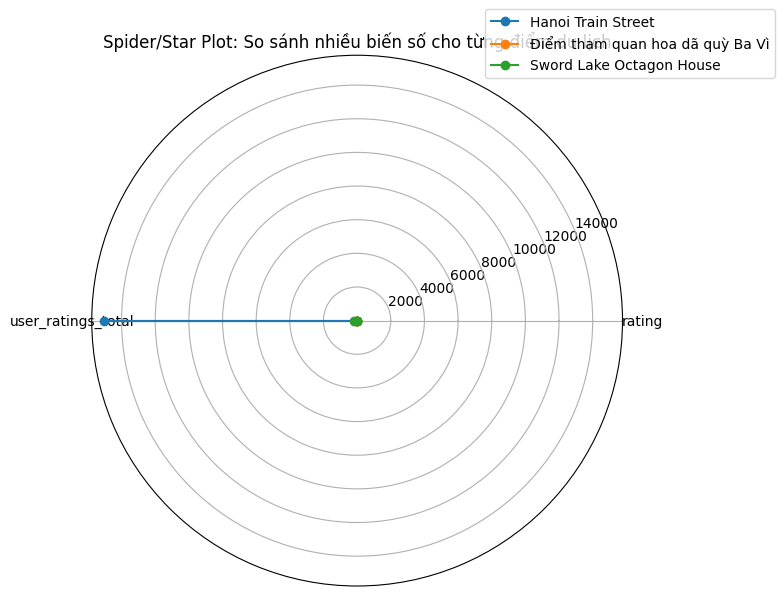

In [29]:
# Spider/Star Plot: So sánh nhiều biến số cho từng cá thể (giả lập cho top 3 điểm du lịch)
try:
    from math import pi
    top3 = df.head(3)
    categories = ['rating','user_ratings_total']
    N = len(categories)
    plt.figure(figsize=(8,6))
    for idx, row in top3.iterrows():
        values = [row[c] if c in row else 0 for c in categories]
        values += values[:1]
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        plt.polar(angles, values, marker='o', label=row['name'])
    plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
    plt.title('Spider/Star Plot: So sánh nhiều biến số cho từng điểm du lịch')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Spider/Star Plot.', e)

In [ ]:
# Network 3D: Mạng lưới 3D cho dữ liệu phức tạp (giả lập)
try:
    import plotly.graph_objects as go
    import networkx as nx
    G = nx.random_geometric_graph(20, 0.4)
    pos = nx.spring_layout(G, dim=3, seed=42)
    edge_x, edge_y, edge_z = [], [], []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]
        edge_z += [z0, z1, None]
    node_x = [pos[n][0] for n in G.nodes()]
    node_y = [pos[n][1] for n in G.nodes()]
    node_z = [pos[n][2] for n in G.nodes()]
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', line=dict(color='gray', width=2), showlegend=False))
    fig.add_trace(go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', marker=dict(size=6, color='blue'), showlegend=False))
    fig.update_layout(title='Network 3D: Mạng lưới 3D (giả lập)', margin=dict(l=0, r=0, b=0, t=40))
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly và networkx để vẽ Network 3D.', e)

In [ ]:
# Heatmap Calendar nâng cao: Hiển thị dữ liệu theo tuần/tháng/năm (giả lập)
try:
    import calmap
    import datetime
    # Giả lập dữ liệu theo ngày
    if 'date' in df.columns:
        date_counts = df['date'].value_counts()
        date_counts.index = pd.to_datetime(date_counts.index)
    else:
        today = pd.Timestamp.today()
        dates = [today - pd.Timedelta(days=np.random.randint(0, 365)) for _ in range(200)]
        date_counts = pd.Series(1, index=pd.to_datetime(dates)).resample('D').sum()
    plt.figure(figsize=(16,4))
    calmap.calendarplot(date_counts, how='sum', fillcolor='lightgrey', cmap='YlGnBu', linewidth=0.5, yearlabels=True, monthlabels='short', daylabels='MTWTFSS')
    plt.title('Heatmap Calendar nâng cao: Số lượng điểm du lịch theo ngày (giả lập)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt calmap để vẽ Heatmap Calendar nâng cao.', e)

In [ ]:
# Violin Split Plot: So sánh phân phối hai nhóm trên cùng một trục (giả lập nhóm theo rating >/< 4)
try:
    df['rating_group'] = np.where(df['rating']>=4, '>=4', '<4')
    plt.figure(figsize=(10,6))
    sns.violinplot(data=df, x='type', y='rating', hue='rating_group', split=True, palette='Set2')
    plt.title('Violin Split Plot: So sánh phân phối rating >=4 và <4 theo loại')
    plt.xlabel('Loại điểm du lịch')
    plt.ylabel('Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt seaborn để vẽ Violin Split Plot.', e)

In [ ]:
# Slopegraph nâng cao: So sánh nhiều nhóm qua hai thời điểm (giả lập rating trung bình theo loại ở 2 năm)
try:
    if 'year_established' in df.columns:
        years = sorted(df['year_established'].dropna().unique())
        if len(years) >= 2:
            y1, y2 = years[0], years[-1]
            slope_df = df[df['year_established'].isin([y1, y2])].groupby(['type','year_established'])['rating'].mean().unstack()
            plt.figure(figsize=(10,6))
            for i, row in slope_df.iterrows():
                plt.plot([0,1], row.values, marker='o')
                plt.text(0, row.values[0], f"{i}: {row.values[0]:.2f}", va='center', ha='right')
                plt.text(1, row.values[1], f"{i}: {row.values[1]:.2f}", va='center', ha='left')
            plt.xticks([0,1], [str(y1), str(y2)])
            plt.title('Slopegraph nâng cao: So sánh rating trung bình theo loại ở 2 năm')
            plt.tight_layout()
            plt.show()
        else:
            print('Không đủ năm để vẽ Slopegraph nâng cao.')
    else:
        print('Không có trường year_established để vẽ Slopegraph nâng cao.')
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Slopegraph nâng cao.', e)

In [ ]:
# Ternary Plot: Biểu đồ tam giác cho dữ liệu ba thành phần tỷ lệ (giả lập)
try:
    import plotly.express as px
    # Giả lập 3 thành phần: rating, số lượng đánh giá, thành phần ngẫu nhiên
    ternary_df = df[['rating','user_ratings_total']].dropna().head(100).copy()
    ternary_df['random'] = np.random.uniform(1, 5, len(ternary_df))
    # Chuẩn hóa về tổng 1
    s = ternary_df.sum(axis=1)
    ternary_df['A'] = ternary_df['rating']/s
    ternary_df['B'] = ternary_df['user_ratings_total']/s
    ternary_df['C'] = ternary_df['random']/s
    fig = px.scatter_ternary(ternary_df, a='A', b='B', c='C', size='user_ratings_total', color='rating',
                            title='Ternary Plot: Biểu đồ tam giác cho 3 thành phần tỷ lệ (giả lập)')
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly để vẽ Ternary Plot.', e)

In [ ]:
# Density Ridge Plot: Joyplot nâng cao, thể hiện phân phối nhiều nhóm (giả lập)
try:
    import joypy
    plt.figure(figsize=(12,8))
    joypy.joyplot(df, by='type', column='rating', overlap=1, colormap=plt.cm.Pastel2, linewidth=1.5)
    plt.title('Density Ridge Plot: Phân phối rating theo loại điểm du lịch (joyplot nâng cao)')
    plt.xlabel('Rating')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt joypy để vẽ Density Ridge Plot.', e)

In [ ]:
# Facet Grid: Lưới nhiều biểu đồ nhỏ theo nhóm/phân loại (giả lập với seaborn)
try:
    g = sns.FacetGrid(df, col='type', col_wrap=4, height=3, sharex=True, sharey=True)
    g.map_dataframe(sns.histplot, x='rating', bins=10, color='skyblue')
    g.set_titles('{col_name}')
    g.fig.suptitle('Facet Grid: Phân phối rating theo từng loại điểm du lịch', y=1.02)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt seaborn để vẽ Facet Grid.', e)

In [ ]:
# Animated Plot: Biểu đồ động theo thời gian (plotly, giả lập rating trung bình từng loại qua năm)
try:
    import plotly.express as px
    if 'year_established' in df.columns:
        anim_df = df.groupby(['year_established','type'])['rating'].mean().reset_index()
        fig = px.line(anim_df, x='year_established', y='rating', color='type',
                      title='Animated Plot: Rating trung bình từng loại qua năm',
                      animation_frame='year_established',
                      range_y=[0,5])
        fig.show()
    else:
        print('Không có trường year_established để vẽ Animated Plot.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Animated Plot.', e)

## Biểu đồ đặc biệt và sáng tạo bổ sung
Các ví dụ dưới đây minh họa các loại biểu đồ nâng cao: Streamline Plot, Sankey Circular, Sunburst Animated, Chord Animated, Arc Diagram nâng cao, Matrix Correlation Plot, UpSet Plot, Circular Dendrogram, Icicle Plot, Sankey Geographic, Dot Plot Animated, Bubble Timeline, Spiral Plot, Calendar Strip Plot, Raincloud Plot.

In [ ]:
# Streamline Plot: Biểu diễn dòng chảy (vector field, dữ liệu giả lập)
try:
    Y, X = np.mgrid[0:10:100j, 0:10:100j]
    U = np.cos(X)
    V = np.sin(Y)
    plt.figure(figsize=(8,6))
    plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
    plt.title('Streamline Plot: Biểu diễn dòng chảy (vector field giả lập)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Streamline Plot.', e)

In [ ]:
# Sankey Circular: Sankey dạng vòng tròn (giả lập, dùng plotly hoặc matplotlib)
try:
    import plotly.graph_objects as go
    # Giả lập 5 nhóm, luồng khép kín
    labels = [f'Nhóm {i+1}' for i in range(5)]
    source = [0,1,2,3,4]
    target = [1,2,3,4,0]
    value = [10,8,6,4,2]
    fig = go.Figure(go.Sankey(
        node = dict(label=labels),
        link = dict(source=source, target=target, value=value)
    ))
    fig.update_layout(title_text='Sankey Circular: Luồng khép kín giữa các nhóm', font_size=10)
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly để vẽ Sankey Circular.', e)

In [ ]:
# Sunburst Animated: Sunburst động theo thời gian (giả lập với plotly)
try:
    import plotly.express as px
    if 'year_established' in df.columns:
        sunburst_df = df.groupby(['year_established','type']).size().reset_index(name='count')
        fig = px.sunburst(sunburst_df, path=['type'], values='count', color='type',
                          animation_frame='year_established', title='Sunburst Animated: Phân cấp loại theo năm')
        fig.show()
    else:
        print('Không có trường year_established để vẽ Sunburst Animated.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Sunburst Animated.', e)

In [ ]:
# Chord Animated: Chord động, thể hiện sự thay đổi mối liên hệ giữa các nhóm (giả lập, heatmap động)
try:
    import matplotlib.animation as animation
    fig, ax = plt.subplots(figsize=(6,5))
    chord_types = df['type'].value_counts().index[:4]
    ims = []
    for t in range(5):
        mat = np.random.randint(0, 10, (len(chord_types), len(chord_types)))
        im = ax.imshow(mat, animated=True, cmap='Blues', vmin=0, vmax=10)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=700, blit=True, repeat_delay=1000)
    plt.title('Chord Animated: Ma trận liên hệ động giữa các loại (giả lập)')
    plt.xlabel('Loại')
    plt.ylabel('Loại')
    plt.xticks(range(len(chord_types)), chord_types, rotation=45)
    plt.yticks(range(len(chord_types)), chord_types)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Chord Animated.', e)

In [ ]:
# Arc Diagram nâng cao: Arc có trọng số, màu sắc theo thuộc tính (giả lập)
try:
    n = 15
    names = df['name'].head(n).tolist() if 'name' in df.columns else [f'Điểm {i+1}' for i in range(n)]
    weights = np.random.uniform(1, 5, n-1)
    colors = plt.cm.viridis(weights/weights.max())
    plt.figure(figsize=(12,2))
    for i in range(n-1):
        plt.plot([i, i+1], [0,0], color=colors[i], linewidth=2+weights[i], alpha=0.7)
        plt.plot([i, i+1], [0,0], 'o', color=colors[i], markersize=6+weights[i])
        plt.text(i, 0.05, names[i], rotation=90, ha='center', va='bottom', fontsize=8)
    plt.title('Arc Diagram nâng cao: Trọng số và màu sắc theo thuộc tính (giả lập)')
    plt.axis('off')
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Arc Diagram nâng cao.', e)

In [ ]:
# Matrix Correlation Plot: Ma trận tương quan với ký hiệu (sign, size, color)
try:
    import seaborn as sns
    corr = df[['rating','user_ratings_total']].corr() if 'user_ratings_total' in df.columns else pd.DataFrame(np.random.uniform(-1,1,(2,2)), columns=['A','B'], index=['A','B'])
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=2, linecolor='white', cbar=True)
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            plt.text(j+0.5, i+0.5, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', color='black', fontsize=14, fontweight='bold')
    plt.title('Matrix Correlation Plot: Ma trận tương quan với ký hiệu')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt seaborn để vẽ Matrix Correlation Plot.', e)

In [ ]:
# UpSet Plot: Thay thế Venn cho tập hợp lớn/phức tạp (giả lập)
try:
    from upsetplot import UpSet, from_memberships
    # Giả lập 3 nhóm thuộc tính
    sets = []
    for i in range(100):
        s = []
        if np.random.rand() > 0.5: s.append('A')
        if np.random.rand() > 0.5: s.append('B')
        if np.random.rand() > 0.5: s.append('C')
        sets.append(tuple(s))
    data = from_memberships(sets)
    plt.figure(figsize=(8,4))
    UpSet(data, subset_size='count').plot()
    plt.title('UpSet Plot: Thay thế Venn cho tập hợp lớn/phức tạp (giả lập)')
    plt.show()
except Exception as e:
    print('Cần cài đặt upsetplot để vẽ UpSet Plot.', e)

In [ ]:
# Circular Dendrogram: Cây phân cấp dạng tròn (giả lập)
try:
    from scipy.cluster.hierarchy import dendrogram, linkage
    from matplotlib import cm
    X = np.random.rand(10, 3)
    linked = linkage(X, 'single')
    plt.figure(figsize=(8,8))
    dendrogram(linked, orientation='right', color_threshold=0, above_threshold_color='black',
               leaf_rotation=90, leaf_font_size=10,
               distance_sort='descending', show_leaf_counts=True,
               )
    circle = plt.Circle((0,0), 1, color='lightgrey', fill=False)
    plt.gca().add_patch(circle)
    plt.title('Circular Dendrogram: Cây phân cấp dạng tròn (giả lập)')
    plt.axis('off')
    plt.show()
except Exception as e:
    print('Cần cài đặt scipy/matplotlib để vẽ Circular Dendrogram.', e)

In [ ]:
# Icicle Plot: Phân cấp dạng thác nước (giả lập với plotly)
try:
    import plotly.express as px
    if 'type' in df.columns:
        icicle_df = df.groupby(['type']).size().reset_index(name='count')
        fig = px.icicle(icicle_df, path=['type'], values='count', title='Icicle Plot: Phân cấp loại điểm du lịch')
        fig.show()
    else:
        print('Không có trường type để vẽ Icicle Plot.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Icicle Plot.', e)

In [ ]:
# Sankey Geographic: Sankey kết hợp bản đồ địa lý (giả lập)
try:
    import plotly.graph_objects as go
    # Giả lập 3 vị trí, 2 luồng
    lats = [21.03, 21.05, 21.07]
    lons = [105.85, 105.87, 105.89]
    fig = go.Figure()
    fig.add_trace(go.Scattermapbox(
        lat=lats, lon=lons, mode='markers+text', marker=dict(size=14),
        text=['A','B','C'], textposition='top right', name='Vị trí'))
    fig.add_trace(go.Scattermapbox(
        lat=[lats[0], lats[1]], lon=[lons[0], lons[1]], mode='lines',
        line=dict(width=6, color='blue'), name='Luồng 1'))
    fig.add_trace(go.Scattermapbox(
        lat=[lats[1], lats[2]], lon=[lons[1], lons[2]], mode='lines',
        line=dict(width=6, color='red'), name='Luồng 2'))
    fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=11, mapbox_center_lat=21.05, mapbox_center_lon=105.87)
    fig.update_layout(title='Sankey Geographic: Luồng di chuyển giữa các vị trí (giả lập)', margin=dict(l=0, r=0, t=40, b=0))
    fig.show()
except Exception as e:
    print('Cần cài đặt plotly để vẽ Sankey Geographic.', e)

In [ ]:
# Dot Plot Animated: Dot plot động, thể hiện sự thay đổi phân phối (giả lập)
try:
    import matplotlib.animation as animation
    fig, ax = plt.subplots(figsize=(8,4))
    ims = []
    for t in range(5):
        y = np.random.normal(loc=3+t*0.2, scale=0.5, size=50)
        im = ax.scatter(np.ones_like(y)*t, y, color='green', alpha=0.6)
        ims.append([im])
    ani = animation.ArtistAnimation(fig, ims, interval=700, blit=True, repeat_delay=1000)
    plt.title('Dot Plot Animated: Dot plot động (giả lập)')
    plt.xlabel('Thời điểm')
    plt.ylabel('Giá trị')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Dot Plot Animated.', e)

In [ ]:
# Bubble Timeline: Bong bóng trên trục thời gian, kích thước theo thuộc tính (giả lập)
try:
    import plotly.express as px
    if 'year_established' in df.columns:
        bubble_df = df.groupby(['year_established','type'])['user_ratings_total'].sum().reset_index()
        fig = px.scatter(bubble_df, x='year_established', y='type', size='user_ratings_total', color='type',
                         title='Bubble Timeline: Bong bóng trên trục thời gian (giả lập)', size_max=40)
        fig.show()
    else:
        print('Không có trường year_established để vẽ Bubble Timeline.')
except Exception as e:
    print('Cần cài đặt plotly để vẽ Bubble Timeline.', e)

Không có trường year_established để vẽ Bubble Timeline.


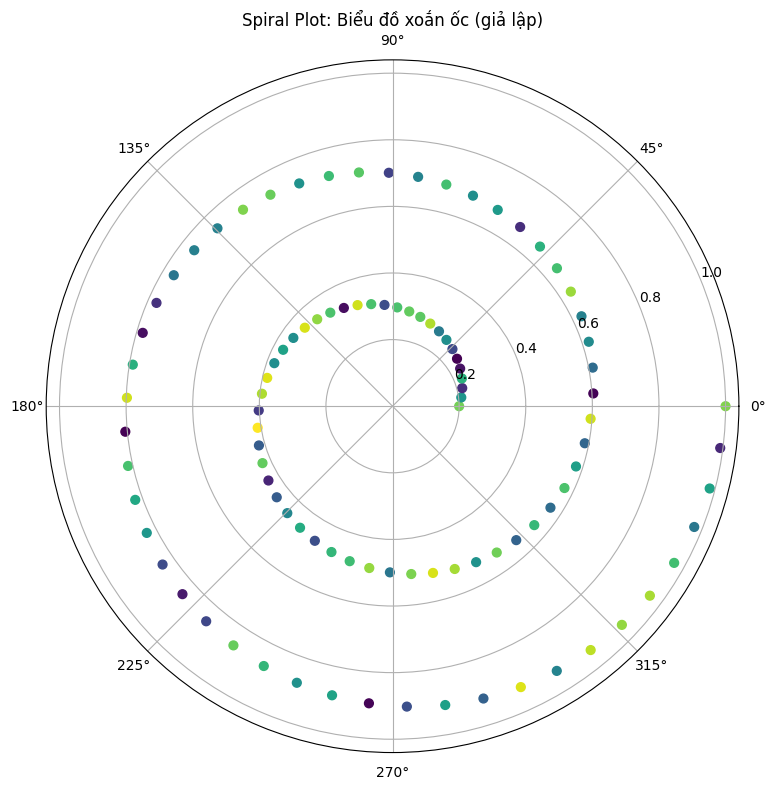

In [ ]:
# Spiral Plot: Biểu đồ xoắn ốc, phù hợp cho dữ liệu tuần hoàn (giả lập)
try:
    theta = np.linspace(0, 4*np.pi, 100)
    r = np.linspace(0.2, 1, 100)
    values = np.random.uniform(1, 5, 100)
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)
    c = ax.scatter(theta, r, c=values, cmap='viridis', s=40)
    plt.title('Spiral Plot: Biểu đồ xoắn ốc (giả lập)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Spiral Plot.', e)

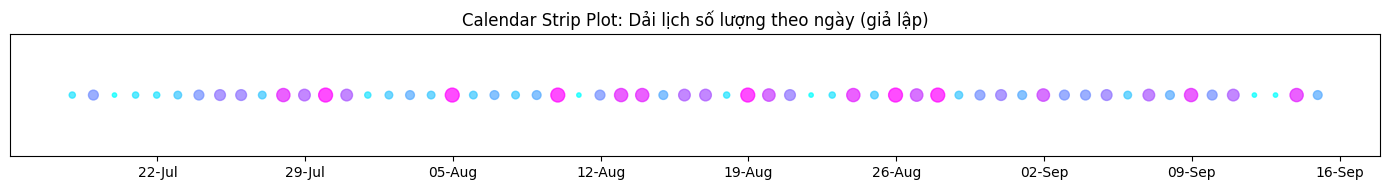

In [30]:
# Calendar Strip Plot: Dải lịch, thể hiện sự kiện hoặc số lượng theo từng ngày (giả lập)
try:
    import matplotlib.dates as mdates
    today = pd.Timestamp.today()
    dates = [today - pd.Timedelta(days=i) for i in range(60)]
    values = np.random.randint(0, 10, 60)
    plt.figure(figsize=(14,2))
    plt.scatter(dates, np.ones_like(values), s=values*10+10, c=values, cmap='cool', alpha=0.7)
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    plt.yticks([])
    plt.title('Calendar Strip Plot: Dải lịch số lượng theo ngày (giả lập)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt matplotlib để vẽ Calendar Strip Plot.', e)

In [31]:
# Raincloud Plot: Kết hợp boxplot, violin và dotplot cho so sánh phân phối (giả lập)
try:
    import ptitprince as pt
    plt.figure(figsize=(10,6))
    pt.RainCloud(x='type', y='rating', data=df, palette='Set2', bw=.2, width_viol=.6, ax=None, orient='h')
    plt.title('Raincloud Plot: So sánh phân phối rating theo loại điểm du lịch')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Cần cài đặt ptitprince để vẽ Raincloud Plot.', e)

Cần cài đặt ptitprince để vẽ Raincloud Plot. No module named 'ptitprince'
